## Задание 1

In [26]:
import numpy as np
with np.load("C:/Users/Матвей/Downloads/data_interp.npz") as data:
  x1, y1 = data['x1'], data['y1']

In [27]:
import matplotlib.pyplot as plt
import sympy as smp

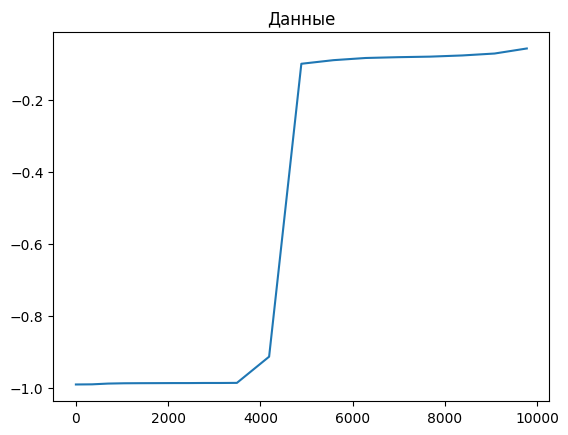

In [28]:
plt.plot(x1,y1)
plt.title('Данные')
plt.show()

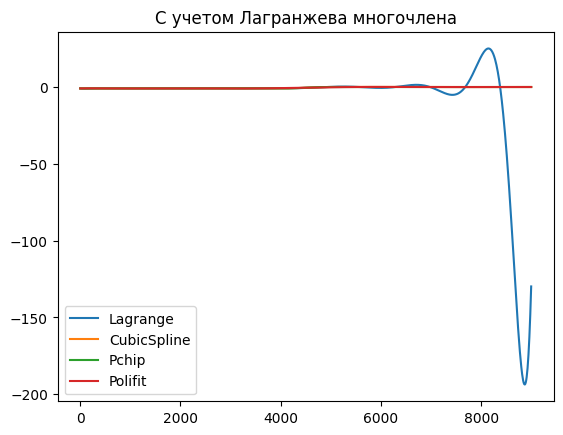

In [29]:
from sympy.polys.polyfuncs import interpolate
t = smp.Symbol('t')
points = [(x1[i], y1[i]) for i in range(len(x1))]
interpolate(points, t)
f = smp.lambdify(t, interpolate(points, t), 'numpy')
xnew = np.linspace(0, 9000, 1000)

from scipy import interpolate
f1 = interpolate.interp1d(x1, y1, kind = 'cubic') 

f2 = interpolate.pchip(x1, y1)


y3 = np.polyval(np.polyfit(x1, y1, 10), xnew)

plt.plot(xnew, f(xnew), '-', xnew, f1(xnew), '-', xnew, f2(xnew), xnew, y3, '-')
plt.legend(['Lagrange', 'CubicSpline', 'Pchip', 'Polifit'], loc = 'best')
plt.title('С учетом Лагранжева многочлена')
plt.show()

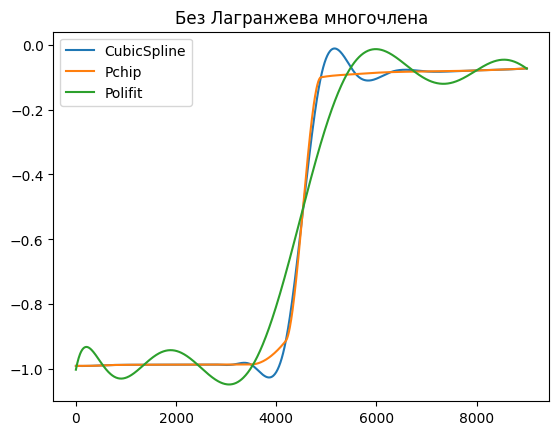

In [30]:
from sympy.polys.polyfuncs import interpolate
t = smp.Symbol('t')
points = [(x1[i], y1[i]) for i in range(len(x1))]
interpolate(points, t)
f = smp.lambdify(t, interpolate(points, t), 'numpy')
xnew = np.linspace(0, 9000, 1000)

from scipy import interpolate
f1 = interpolate.interp1d(x1, y1, kind = 'cubic') 

f2 = interpolate.pchip(x1, y1)


y3 = np.polyval(np.polyfit(x1, y1, 10), xnew)

plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), xnew, y3, '-')
plt.legend(['CubicSpline', 'Pchip', 'Polifit'], loc = 'best')
plt.title('Без Лагранжева многочлена')
plt.show()



## Задание 2

In [31]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        A = np.vander(self.xk, np.shape(self.xk)[0])
        params = np.linalg.solve(A, self.yk)
        return(np.polyval(params, x))
    
        raise NotImplementedError()

In [32]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Задание 3

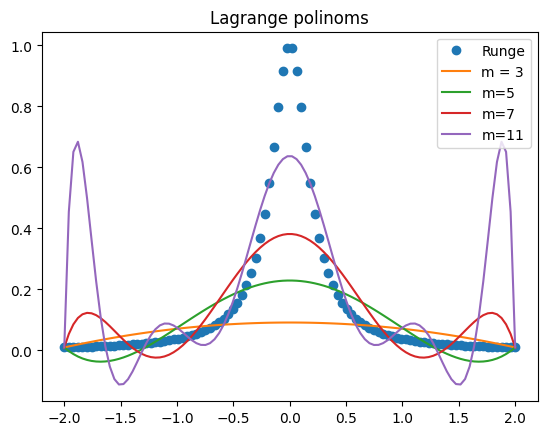

In [33]:
from sympy.polys.polyfuncs import interpolate
t = smp.Symbol('t')

x1 = np.linspace(-2,2,4)
x2 = np.linspace(-2,2,6)
x3 = np.linspace(-2,2,8)
x4 = np.linspace(-2,2,12)
y1 = runge_func(x1)
y2 = runge_func(x2)
y3 = runge_func(x3)
y4 = runge_func(x4)

points1 = [(x1[i],y1[i]) for i in range(len(x1))]
points2 = [(x2[i],y2[i]) for i in range(len(x2))]
points3 = [(x3[i],y3[i]) for i in range(len(x3))]
points4 = [(x4[i],y4[i]) for i in range(len(x4))]

interpolate(points,t)
f1 = smp.lambdify(t, interpolate(points1, t), 'numpy')
f2 = smp.lambdify(t, interpolate(points2, t), 'numpy')
f3 = smp.lambdify(t, interpolate(points3, t), 'numpy')
f4 = smp.lambdify(t, interpolate(points4, t), 'numpy')

w = np.linspace(-2,2,100)

plt.plot(w, runge_func(w), 'o', w, f1(w), '-', w, f2(w), '-', w, f3(w), '-', w, f4(w), '-')
plt.legend(['Runge', 'm = 3', 'm=5', 'm=7', 'm=11'], loc = 'best')
plt.title('Lagrange polinoms')
plt.show()

In [34]:
from scipy.special import roots_chebyt

In [35]:
roots_chebyt(10)

(array([-0.98768834, -0.89100652, -0.70710678, -0.4539905 , -0.15643447,
         0.15643447,  0.4539905 ,  0.70710678,  0.89100652,  0.98768834]),
 array([0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927,
        0.31415927, 0.31415927, 0.31415927, 0.31415927, 0.31415927]))

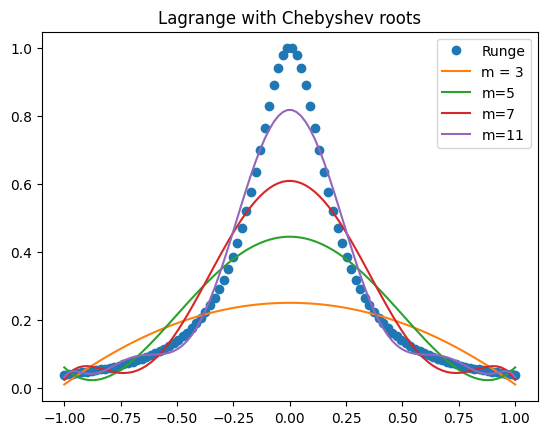

In [36]:
from sympy.polys.polyfuncs import interpolate
t = smp.Symbol('t')

q1 = roots_chebyt(4)[0]
q2 = roots_chebyt(6)[0]
q3 = roots_chebyt(8)[0]
q4 = roots_chebyt(12)[0]
r1 = runge_func(q1)
r2 = runge_func(q2)
r3 = runge_func(q3)
r4 = runge_func(q4)

points1 = [(q1[i],r1[i]) for i in range(len(q1))]
points2 = [(q2[i],r2[i]) for i in range(len(q2))]
points3 = [(q3[i],r3[i]) for i in range(len(q3))]
points4 = [(q4[i],r4[i]) for i in range(len(q4))]

interpolate(points,t)
f1 = smp.lambdify(t, interpolate(points1, t), 'numpy')
f2 = smp.lambdify(t, interpolate(points2, t), 'numpy')
f3 = smp.lambdify(t, interpolate(points3, t), 'numpy')
f4 = smp.lambdify(t, interpolate(points4, t), 'numpy')

w = np.linspace(-1,1,100)

plt.plot(w, runge_func(w), 'o', w, f1(w), '-', w, f2(w), '-', w, f3(w), '-', w, f4(w), '-')
plt.legend(['Runge', 'm = 3', 'm=5', 'm=7', 'm=11'], loc = 'best')
plt.title('Lagrange with Chebyshev roots')
plt.show()

In [38]:
import scipy

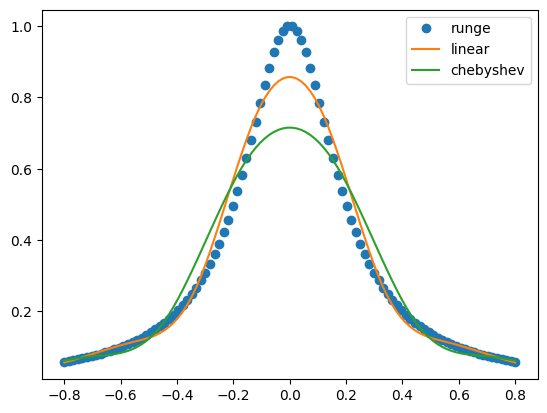

In [43]:
o = np.linspace(-1,1,10)
a = roots_chebyt(10)[0]
yo = runge_func(o)
ya = runge_func(a)
fo = scipy.interpolate.interp1d(o, yo, kind = 'cubic')
fa = scipy.interpolate.interp1d(a, ya, kind = 'cubic')

xn = np.linspace(-0.8,0.8,100)
plt.plot(xn, runge_func(xn), 'o', xn, fo(xn), '-', xn, fa(xn),'-')
plt.legend(['runge','linear', 'chebyshev'], loc = 'best')
plt.show()

In [44]:
def u(x, eps = 0.21):
    return np.sqrt(eps*(2+eps))/(2*3.14*(1+eps-np.cos(x)))

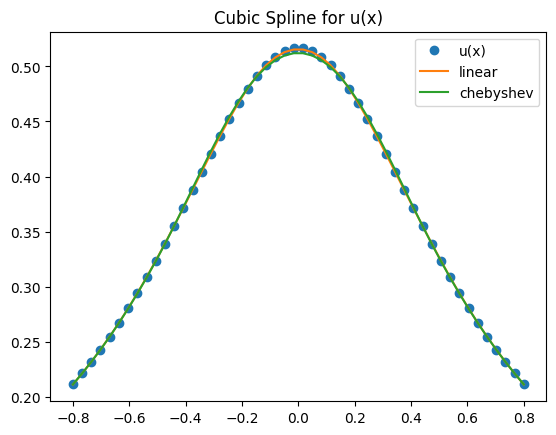

In [50]:
o = np.linspace(-1,1,10)
a = roots_chebyt(10)[0]
yo = u(o)
ya = u(a)
fo = scipy.interpolate.interp1d(o, yo, kind = 'cubic')
fa = scipy.interpolate.interp1d(a, ya, kind = 'cubic')

xn = np.linspace(-0.8,0.8,50)
plt.plot(xn, u(xn), 'o', xn, fo(xn), '-', xn, fa(xn),'-')
plt.legend(['u(x)','linear', 'chebyshev'], loc = 'best')
plt.title('Cubic Spline for u(x)')
plt.show()

## Задача 4

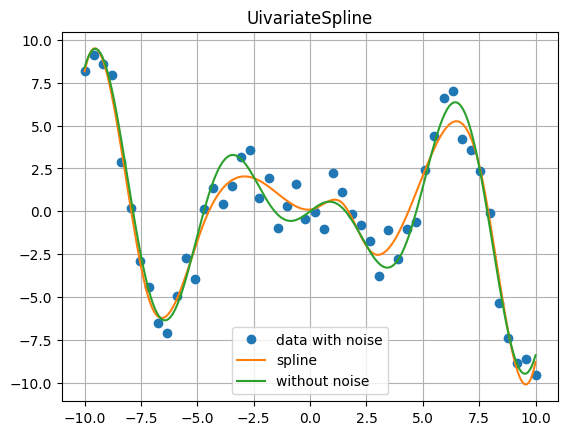

In [72]:
x = np.linspace(-10, 10, 50)
y = x*np.cos(x) + np.random.standard_normal(50)
from scipy.interpolate import UnivariateSpline
spline = UnivariateSpline(x, y, s=50)
xs = np.linspace(-10, 10, 200)
ys = spline(xs)
y_true = xs*np.cos(xs)
plt.plot(x, y, 'o', xs, ys, '-', xs, y_true, '-')
plt.legend(['data with noise', 'spline', 'without noise'], loc = 'best')
plt.title('UivariateSpline')
plt.grid(True)
plt.show()


## Задание 5

Производная сплайном:

In [89]:
import numpy as np

t = np.linspace(0, 1000, 1000)
u = 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t)) + 0.5 * np.random.randn(len(t))

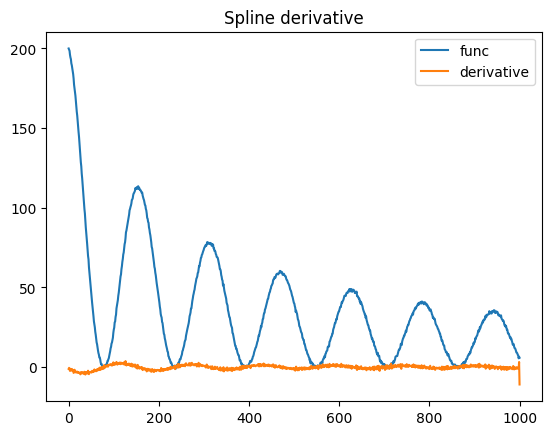

In [111]:
spline = UnivariateSpline(t, u, s=10)
u1 = spline.derivative()
ys = u1(t)
plt.plot(t, u, '-', t, ys, '-')
plt.legend(['func', 'derivative'], loc='best')
plt.title('Spline derivative')
plt.show()

Производная через конечные разности

In [105]:
def v(t):
    return 200 / (1 + t/200) * (0.5 + 0.5 * np.cos(0.04 * t)) + 0.5 * np.random.randn(len(t))

In [106]:
def u2(x, dx=1):
    return (v(x+dx)-v(x))/dx

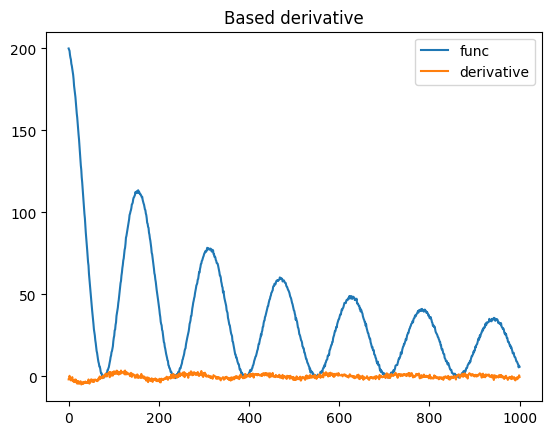

In [112]:
yw = u2(t, dx=1)
plt.plot(t, u, '-', t, yw, '-')
plt.legend(['func', 'derivative'], loc='best')
plt.title('Based derivative')
plt.show()